# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

### Notebook Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

np.random.seed(42)

### 0. Load and inspect the data

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [4]:
df.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

### 1. Is the distribution of body temperatures normal?

Probably.  The EDA and statistical test below don't show enough to say that it isn't.

**Graphs** - The PDF, ECDF and QQ Plots all look like they should for normally distributed data. <br>
**Statistical Tests** - The statistical tests from scipi also suggest the data is normally distributed and certainly don't provide enough strong evidence to say that it is not.

**a. EDA**

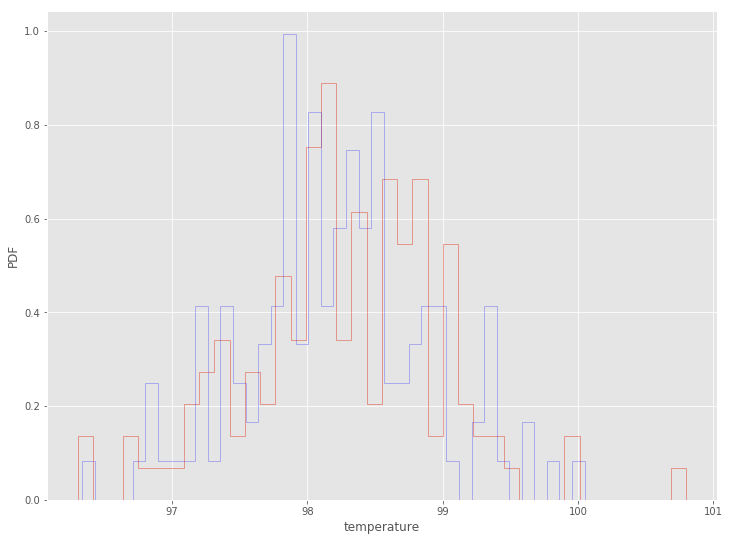

In [5]:
fig, ax = plt.subplots(figsize=(12, 9))
plt.hist(df.temperature, bins=40, histtype='step', density=True)

mu = np.mean(df.temperature)
sigma = np.std(df.temperature)
true_normal = np.random.normal(mu, sigma, size=130)

plt.hist(true_normal, bins=40, color='blue', histtype='step', density=True, alpha=0.5)
plt.xlabel('temperature')
plt.ylabel('PDF')
plt.show()

In [6]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

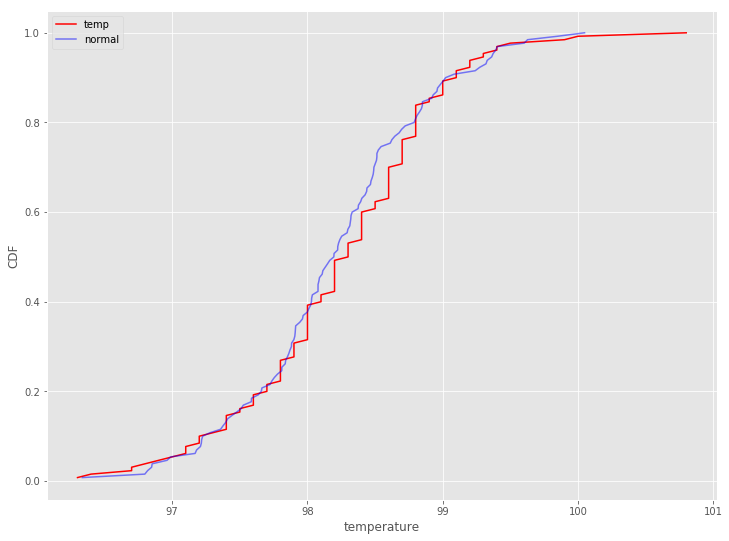

In [7]:
x_temp, y_temp = ecdf(df.temperature)
x_norm, y_norm = ecdf(true_normal)

fig, ax = plt.subplots(figsize=(12, 9))
plt.plot(x_temp, y_temp, color='red', label='temp')
plt.plot(x_norm, y_norm , color='blue', alpha=0.5, label='normal')
plt.xlabel('temperature')
plt.ylabel('CDF')
plt.legend()
plt.show()

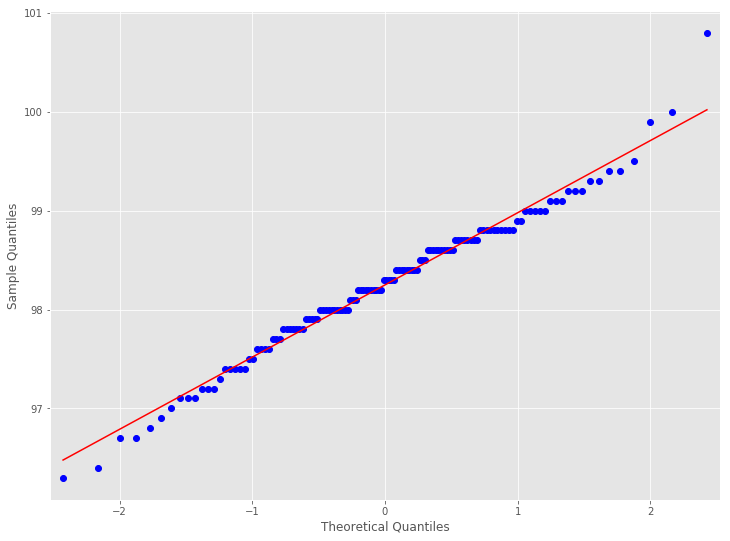

In [8]:
from statsmodels.graphics.gofplots import qqplot

fig, ax = plt.subplots(figsize=(12, 9))
qqplot(df.temperature, line='s', ax=ax)
plt.show()

**b. Statistical Tests**

In [9]:
import scipy.stats as stats

def test_normal(data):
    stat, p = stats.normaltest(data)
    print('Statistic={:.3f}, p={:.3f}'.format(stat, p))
    print('H0 = data is normal')
    if p < 0.05:
        print('REJECT H0')
    else:
        print('Cannot reject H0')

print('Temperature Data:')
test_normal(df.temperature)

print('\nGenerated Normal Data:')
test_normal(true_normal)

Temperature Data:
Statistic=2.704, p=0.259
H0 = data is normal
Cannot reject H0

Generated Normal Data:
Statistic=0.185, p=0.911
H0 = data is normal
Cannot reject H0


### 2. Is the sample size large? Are the observations independent?

Yes, you generally need 30 or more samples for the data to be considered "sufficiently large" under the CLT. Yes, the observations are likely independent by the 10% rule. 

### 3. Is the true population mean really 98.6 degrees F?

**a. Bootstrap test**

In [10]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))


def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

# Let's look at the Standard Error of the Mean from this sample
sem = np.std(df.temperature) / np.sqrt(len(df.index))
print('SEM = {:.2f}'.format(sem))

# Take 1,000 bootstrap replicates of the mean
bs_replicates = draw_bs_reps(df.temperature, np.mean, 1000)
print('Bootstrap sigma = {:.2f}'.format(np.std(bs_replicates)))

# Do a bootstrap 95% confidence interval
(lower, upper) = np.percentile(bs_replicates, [2.5, 97.5])
print("There's a 95% chance that the true population average temperature is between {:.2f} and {:.2f}".format(lower, upper))

SEM = 0.06
Bootstrap sigma = 0.06
There's a 95% chance that the true population average temperature is between 98.13 and 98.37


**b. Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?**

First, let's state the Null and Alternative hypothesis and our significance level.

H0 = The average human body temperature is 98.6 degrees<br>
Ha = The average human body temperature is not 98.6 degrees

Alpha = 0.05

Let's use a one-sample T-test here since we're comparing a data sample against a "known" value. A two-sample test would be more appropriate if we were comparing means from two populations.

**c. In this situation, is it appropriate to use the t or z statistic?**

Since we're comparing means, the T-statistic is appropriate. The Z-statistic tends to under-estimate here and hence the T-distribution with fatter tails.

In [11]:
alpha = 0.05
tstat, p = stats.ttest_1samp(df.temperature, 98.6)
print('T Statistic={:.3f}, P = {:.6f}'.format(tstat, p))
if p < 0.05:
    print('Reject H0')
else:
    print('Cannot reject H0')

T Statistic=-5.455, P = 0.000000
Reject H0


**d. Now try using the other test. How is the result be different? Why?**

The Z and T tests tell the same story that the null hypothesis should be rejected. This makes sense since the values of both statistics are large - more than 3 standard errors away.

In [12]:
from statsmodels.stats.weightstats import ztest

zstat, p = ztest(df.temperature, value=98.6)
print('Z Statistic={:.3f}, P = {:.6f}'.format(zstat, p))
if p < 0.05:
    print('Reject H0')
else:
    print('Cannot reject H0')

Z Statistic=-5.455, P = 0.000000
Reject H0


### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

**a. Which one is the correct one to use?**

We should still use the T-test even for a small sample since we showed above that the distribution it was taken from is close to normal and certainly doesn't have outliers or strong skew.

In [13]:
sample10 = np.random.choice(df.temperature, 10)
sample10

array([97.6, 98.3, 97.4, 98.2, 98.7, 98.4, 98.2, 98. , 98.8, 97.1])

In [14]:
tstat, p = stats.ttest_1samp(sample10, 98.6)
print('T Statistic={:.3f}, P = {:.6f}'.format(tstat, p))
if p < 0.05:
    print('Reject H0')
else:
    print('Cannot reject H0')

T Statistic=-3.037, P = 0.014086
Reject H0


In [15]:
# Just for comparison, calculate a Z score manually and using scipy
sample_mu = np.mean(sample10)
print('Sample mean = {:.3f}'.format(sample_mu))

sample_sigma = np.std(sample10)
print('Sample sigma = {:.3f}'.format(sample_sigma))

sem = sample_sigma / np.sqrt(len(sample10))
print('SEM = {:.3f}'.format(sem))

stat = (sample_mu - 98.6) / sem
print('Test statistic = {:.3f}'.format(stat))

zstat, p = ztest(sample10, value=98.6)
print('Z stat from statsmodels = {:.3f}'.format(zstat))

Sample mean = 98.070
Sample sigma = 0.524
SEM = 0.166
Test statistic = -3.201
Z stat from statsmodels = -3.037


**b. What do you notice? What does this tell you about the difference in application of the t and z statistic?**

With statistics at values less than -3, you don't even need to calculate P-values.  They're going to be small and less than 0.05. Yes, the P value from a T-distribution will be slightly larger because of the fatter tails but still small enough to reject H0.

### 4. At what temperature should we consider someone's temperature to be "abnormal"?

As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.

In [16]:
# Take 1,000 bootstrap replicates of the mean
bs_replicates = draw_bs_reps(df.temperature, np.mean, 1000)

# Find the bootstrap interquartile range (IQR)
(lower, median, upper) = np.percentile(bs_replicates, [25, 50, 75])
iqr = upper - lower

# An outlier is 1.5 above or below the IQR
outlier = iqr * 1.5

print('An "abnormal" temperature would be below {:.2f} or above {:.2f}'.format(lower-outlier, upper+outlier))

An "abnormal" temperature would be below 98.084 or above 98.417


For the frequentist approach, let's say that an abnormal temp (+/-) has a 10% chance or less of being observed.

In [23]:
# The SEM was calculated above
# The critical T-value to contain 90% of the average body temps is...
pct = 0.9
dof = len(df.temperature) - 1
norm_pct = (1.0 - pct) / 2.0
t_val = stats.t.ppf(norm_pct, dof) * -1.0

mean = np.mean(df.temperature)
lower_f = mean - t_val * sem
upper_f = mean + t_val * sem

print('Critical T-value = {:.2f}'.format(t_val))

print('From the frequentist approach, an abnormal temp would be below {:.2f} or above {:.2f}'.format(lower_f, upper_f))

Critical T-value = 1.66
From the frequentist approach, an abnormal temp would be below 97.97 or above 98.52


### 6. Is there a significant difference between males and females in normal temperature?

In [35]:
df_f = df[df.gender == 'F']
df_f.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
3,99.2,F,66.0
4,98.0,F,73.0
8,98.4,F,84.0


In [36]:
df_f.temperature.describe()

count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64

In [37]:
df_m = df[df.gender == 'M']
df_m.temperature.describe()

count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64

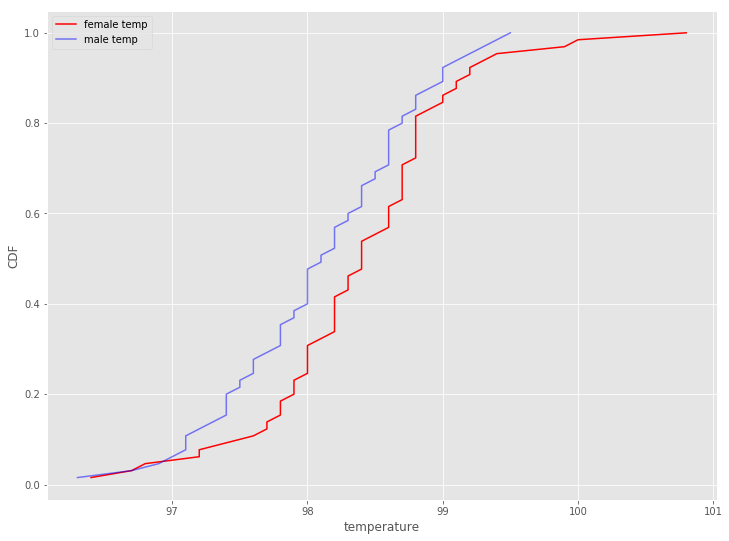

In [40]:
xf_temp, yf_temp = ecdf(df_f.temperature)
xm_temp, ym_temp = ecdf(df_m.temperature)

fig, ax = plt.subplots(figsize=(12, 9))
plt.plot(xf_temp, yf_temp, color='red', label='female temp')
plt.plot(xm_temp, ym_temp , color='blue', alpha=0.5, label='male temp')
plt.xlabel('temperature')
plt.ylabel('CDF')
plt.legend()
plt.show()

The above summary stats and ECDF certainly do suggest that the average female body temp is slightly higher than that for males. Both Carl Wunderlich's original 1895 study and also the more recent U Maryland study agree that the average female body temp is about 0.3 degrees higher than males. This provides a terrific explaination for the ongoing battle for thermostat control in my home and others around the globe.